# 8.9.3 交互方向乗数法のサンプルコード

In [1]:
import numpy as np

### コード8.9 ■ コード8.8 の連結Lasso への適用例

ADMM: 反復回数176, 目的関数値2.256e+02, ||r_k||=1.991e-02, ||s_k||=3.166e-03, rho_k=6.250e-01


Text(0, 0.5, '回帰係数 $x_i$')

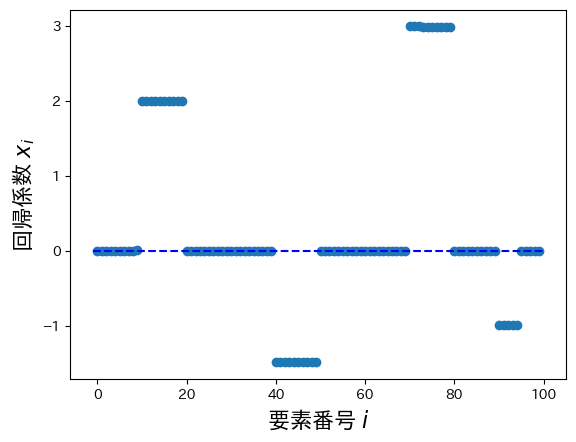

In [7]:
from code8_8 import * # generalized_lasso_ADMM のコードを読み込み
from code8_4 import * #ソフト閾値関数 soft_thresholding のコードを読み込み
import matplotlib.pyplot as plt
import japanize_matplotlib 
# データの生成
np.random.seed(0)
n, m = 100, 500
A = np.random.randn(m, n)
x_true = np.zeros(n)
x_true[10:20] = 2  # 10 から 20 の範囲は一定の非ゼロ値
x_true[40:50] = -1.5  # 40 から 50 の範囲は一定の非ゼロ値
x_true[70:80] = 3  # 70 から 80 の範囲は一定の非ゼロ値
x_true[90:95] = -1  # 70 から 80 の範囲は一定の非ゼロ値
b = A @ x_true + np.random.randn(m) * 0.1
C1, C2 = 1, 10
D = np.eye(n) - np.eye(n, k=1)
D = D[:-1, :]
D_Fus = np.vstack([np.eye(n), C2/C1*D]) # 一般化 Lasso の D を計算

x_0 = np.zeros(n) # x の初期点をゼロベクトル
y_0 = np.zeros(D_Fus.shape[0]) # y の初期点をゼロベクトル
mu_0 = np.zeros(D_Fus.shape[0]) # mu の初期点をゼロベクトル
x, y, mu = generalized_lasso_ADMM(A, b, D_Fus, C1, x_0, y_0, soft_thresholding)
plt.scatter(range(n), x)
plt.hlines([0], -1, n, "blue", linestyles='dashed')
plt.xlabel(r'要素番号 $i$', fontsize=16)
plt.ylabel(r'回帰係数 $x_i$', fontsize=16)

書籍では23行目
```
x, y, mu = generalized_lasso_ADMM(A, b, D_Fus, C1, x_0, y_0, soft_thresholding)
```
のところが、以下のコードのように正則化パラメータC1がCとなっています．そのため，前章で設定した値を引き継いでC=10で実行された結果が出ていますので注意してください．
```
x, y, mu = generalized_lasso_ADMM(A, b, D_Fus, C, x_0, y_0, soft_thresholding)
```